In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras
from keras import layers
from keras.layers import Dense, LeakyReLU, Flatten, Dropout, BatchNormalization, Activation, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
from pandas import read_excel, DataFrame, Series
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor --depricated
from keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [37]:
df_matrix = pd.read_csv('Datasets/df_clean.csv')
df_matrix.head(2)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.0,21.25,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0


In [6]:
#pip install scikeras

In [38]:
df_matrix.shape

(921, 14)

In [39]:
target_matrix = df_matrix['Соотношение матрица-наполнитель']
train_matrix = df_matrix.drop(['Соотношение матрица-наполнитель', 'Unnamed: 0'], axis=1)

In [40]:
target_matrix.head(2)

0    1.857143
1    1.857143
Name: Соотношение матрица-наполнитель, dtype: float64

In [41]:
train_matrix.head(2)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,2030.0,738.736842,129.0,21.25,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0


In [42]:
x_train, x_test, y_train, y_test = train_test_split(train_matrix, target_matrix, test_size = 0.3, random_state = 17)

In [43]:
# нормализуем входные данные и преобразуем в np.array
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [44]:
model = Sequential(x_train_n)

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(1))
model.add(Activation(activation='elu'))

In [45]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_absolute_error')

In [46]:
%%time
history = model.fit(x_train, y_train,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 2s 32ms/step - loss: 2.1731 - val_loss: 2.2354
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 1.0306 - val_loss: 1.3766
Epoch 3/40
9/9 [==============================] - 0s 7ms/step - loss: 0.8745 - val_loss: 1.5343
Epoch 4/40
9/9 [==============================] - 0s 10ms/step - loss: 0.7996 - val_loss: 1.5586
Epoch 5/40
9/9 [==============================] - 0s 14ms/step - loss: 0.8311 - val_loss: 1.2254
Epoch 6/40
9/9 [==============================] - 0s 10ms/step - loss: 0.7393 - val_loss: 0.9976
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 0.7430 - val_loss: 1.2495
Epoch 8/40
9/9 [==============================] - 0s 10ms/step - loss: 0.7482 - val_loss: 1.1428
Epoch 9/40
9/9 [==============================] - 0s 13ms/step - loss: 0.7436 - val_loss: 1.1164
Epoch 10/40
9/9 [==============================] - 0s 12ms/step - loss: 0.7342 - val_loss: 1.1154
Epoch 11/40
9/9 [===============

In [78]:
model.summary()
model.save('models/model1')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)              

INFO:tensorflow:Assets written to: models/model1/assets


In [79]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='violet', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

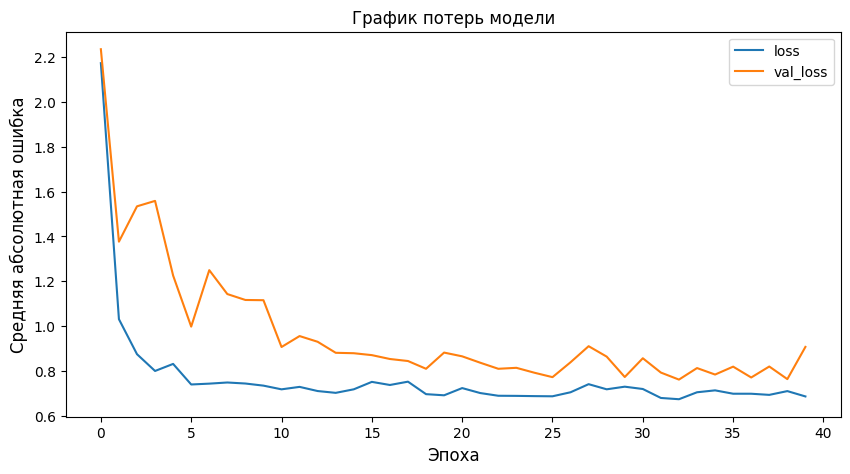

In [80]:
model_loss_plot(history)

9/9 [==============================] - 0s 3ms/step


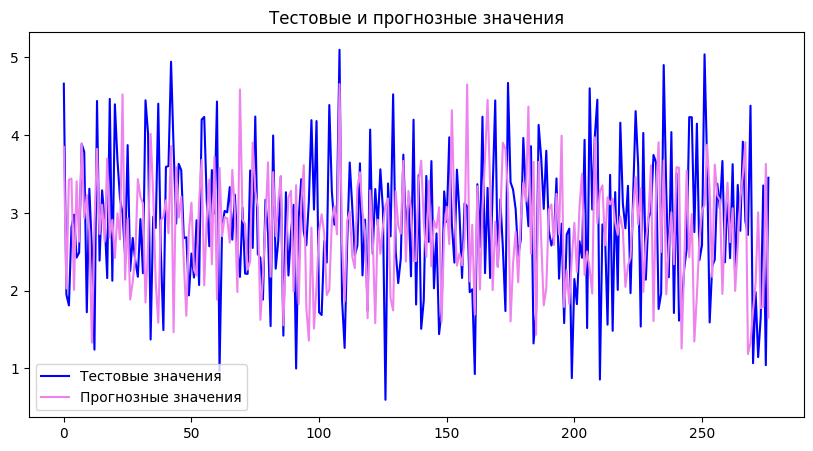

In [81]:
predicted = model.predict(np.array((x_test)))
original = y_test.values

actual_and_predicted_plot(original, predicted)

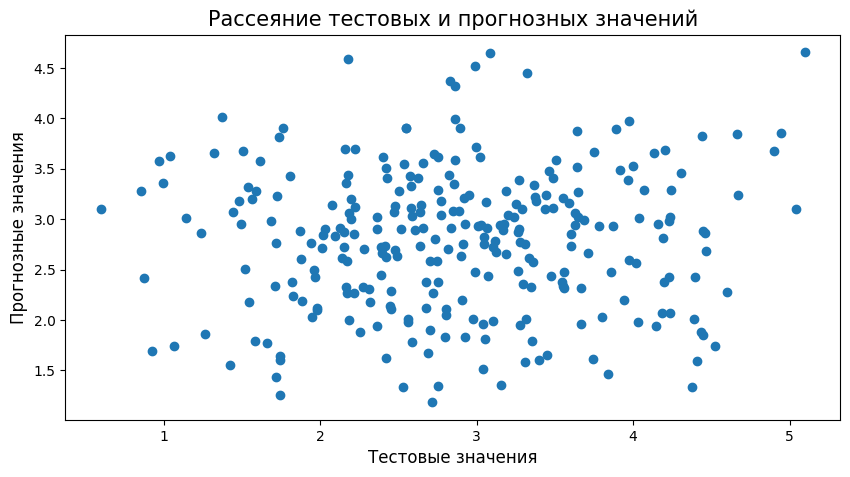

In [82]:
actual_and_predicted_scatter(original, predicted)

In [83]:
print(f'Model MAE: {model.evaluate(x_test, y_test, verbose=1):.5f}')

9/9 [==============================] - 0s 3ms/step - loss: 0.8854
Model MAE: 0.88535


In [84]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test-np.mean(y_test))):.5f}')

MAE среднего значения: 0.73074


In [85]:
model2 = Sequential(x_train_n)

model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(LeakyReLU())
model2.add(Dense(128, activation='selu'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='selu'))
model2.add(BatchNormalization())
model2.add(Dense(32, activation='selu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU())
model2.add(Dense(16, activation='selu'))
model2.add(BatchNormalization())
model2.add(Dense(1))
model2.add(Activation('selu'))

In [86]:
early_model2 = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [87]:
model2.compile(optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5), loss='mean_absolute_error')

In [88]:
%%time
history2 = model2.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_model2]
    )

Epoch 1/100
9/9 [==============================] - 3s 33ms/step - loss: 2.7191 - val_loss: 2.4240
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.9510 - val_loss: 1.6519
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 1.2363 - val_loss: 1.0468
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.9033 - val_loss: 0.9229
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 0.7474 - val_loss: 0.9038
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.7063 - val_loss: 1.0741
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.7866 - val_loss: 0.8737
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6923 - val_loss: 0.8942
Epoch 9/100
9/9 [==============================] - 0s 14ms/step - loss: 0.6916 - val_loss: 0.8900
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6728 - val_loss: 0.8407
Epoch 11/100
9/9 [===

In [89]:
model2.summary()
model2.save('models/model2')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_15 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_16 (Bat  (None, 128)             

INFO:tensorflow:Assets written to: models/model2/assets


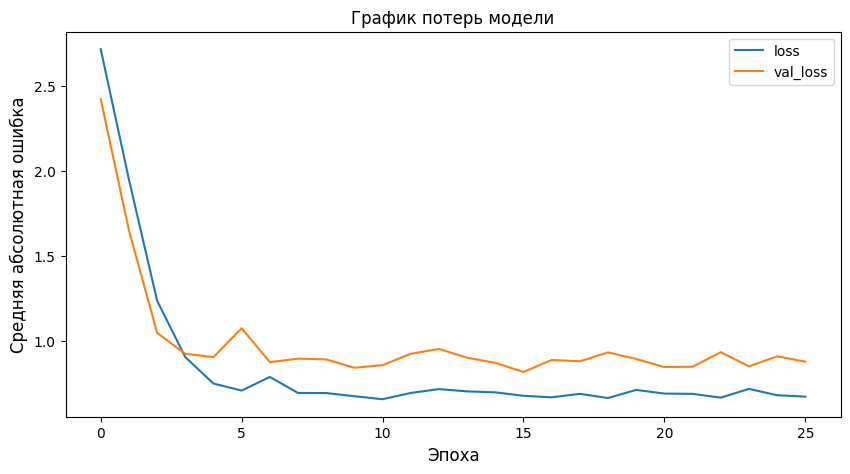

In [90]:
model_loss_plot(history2)

9/9 [==============================] - 0s 4ms/step


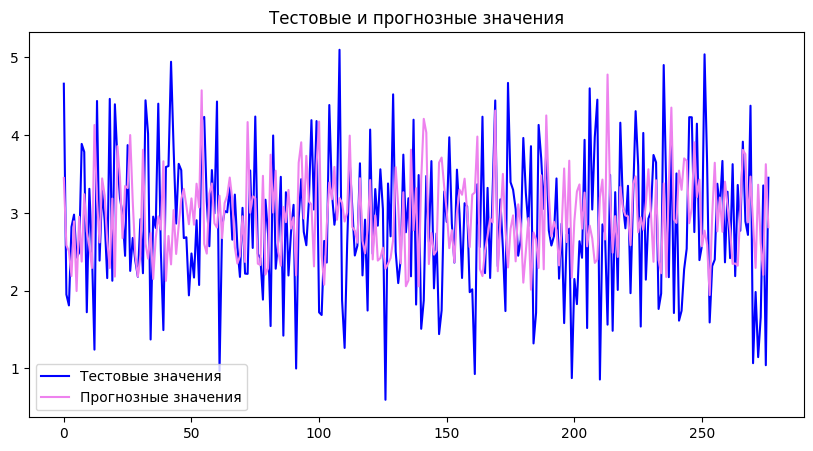

In [91]:
predicted2 = model2.predict(np.array((x_test)))
original2 = y_test.values

actual_and_predicted_plot(original2, predicted2)

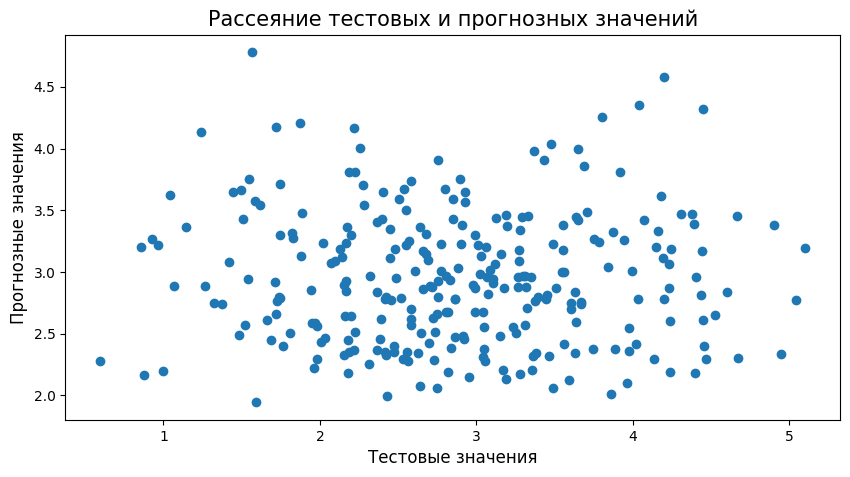

In [92]:
actual_and_predicted_scatter(original2, predicted2)

In [95]:
print(f'Model MAE: {model2.evaluate(x_test, y_test):.5f}')

9/9 [==============================] - 0s 4ms/step - loss: 0.8348
Model MAE: 0.83484


In [94]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test-np.mean(y_test))):.5f}')

MAE среднего значения: 0.73074
